# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=False)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=False)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] + df["rsus"]
    df["FLNS"] = -(df["rlus"] + df["rlds"])
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "ACCESS1-0"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/huss_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.591815710067749 to load the data
*********Start to merge*********
It takes elapsed_time 0.033986806869506836 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.871477842330933 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.09467887878418 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.674182653427124 to mask the layer
*********Start to plot the layer*********


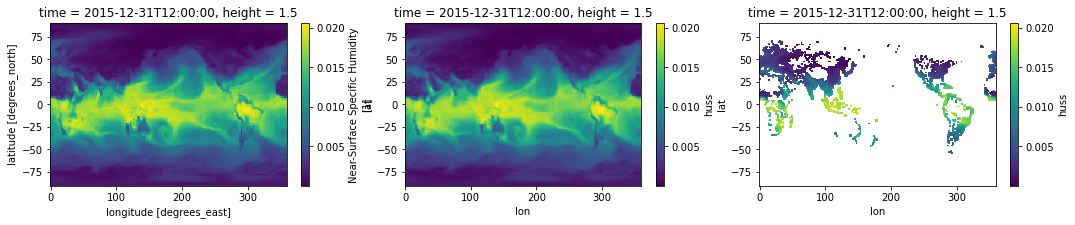

It takes elapsed_time 0.7101552486419678 to plot the layer
It takes elapsed_time 31.97776770591736 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/tas_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.058314085006714 to load the data
*********Start to merge*********
It takes elapsed_time 0.06588339805603027 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 18.024918794631958 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.108261823654175 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.669811487197876 to mask the layer
*********Start to plot the layer*********


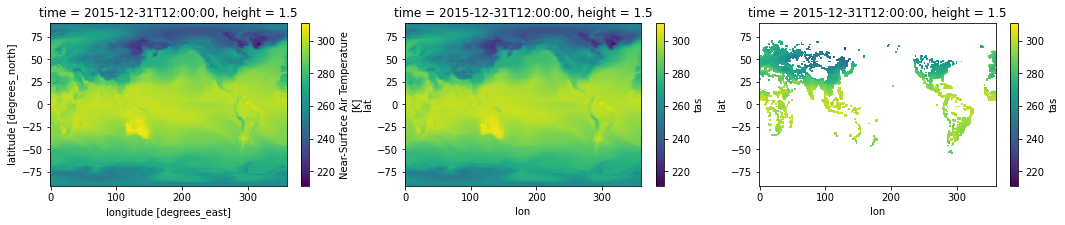

It takes elapsed_time 0.6975722312927246 to plot the layer
It takes elapsed_time 31.62592649459839 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/uas_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.8067665100097656 to load the data
*********Start to merge*********
It takes elapsed_time 0.06373929977416992 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.969327211380005 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.98771619796753 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6664590835571289 to mask the layer
*********Start to plot the layer*********


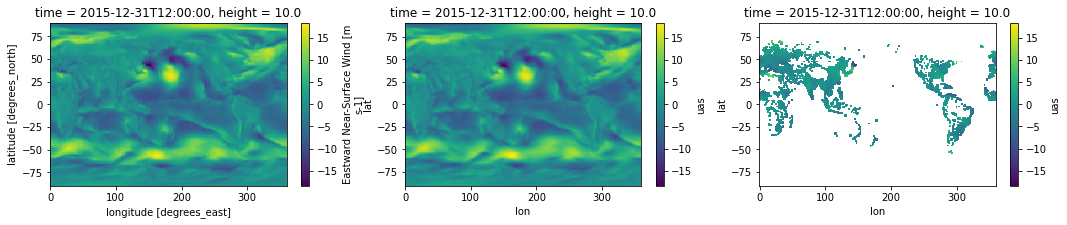

It takes elapsed_time 0.711798906326294 to plot the layer
It takes elapsed_time 31.206965446472168 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/vas_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.8171908855438232 to load the data
*********Start to merge*********
It takes elapsed_time 0.05222487449645996 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.56508779525757 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.996464967727661 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6585590839385986 to mask the layer
*********Start to plot the layer*********


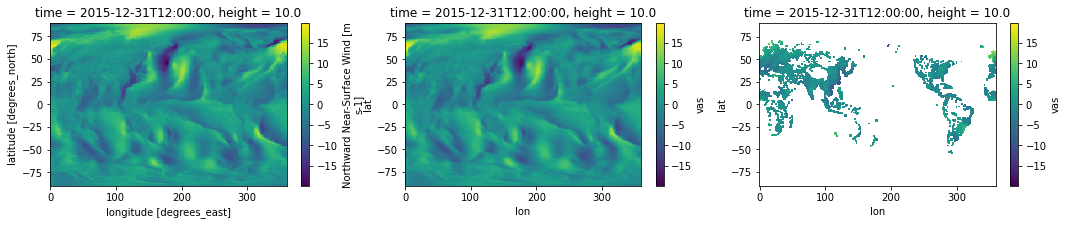

It takes elapsed_time 0.6728241443634033 to plot the layer
It takes elapsed_time 30.763952493667603 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/pr_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.921523094177246 to load the data
*********Start to merge*********
It takes elapsed_time 0.036710500717163086 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.446317195892334 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.033442258834839 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6545002460479736 to mask the layer
*********Start to plot the layer*********


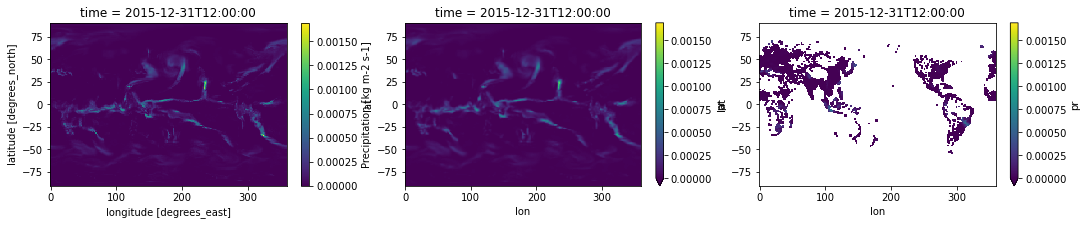

It takes elapsed_time 0.6295835971832275 to plot the layer
It takes elapsed_time 30.723047256469727 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/prsn_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 2.117018461227417 to load the data
*********Start to merge*********
It takes elapsed_time 0.04595208168029785 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.418923139572144 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.04916787147522 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6628923416137695 to mask the layer
*********Start to plot the layer*********


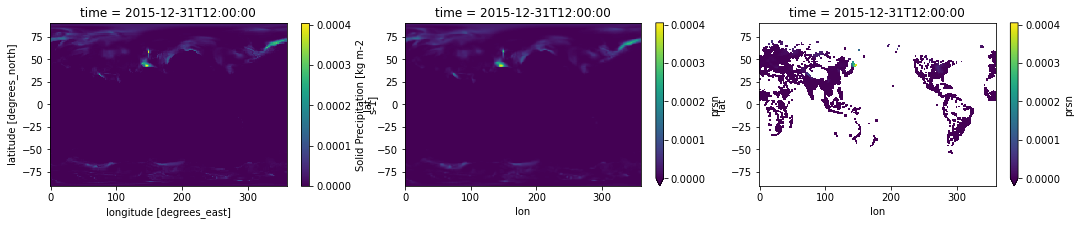

It takes elapsed_time 0.6086592674255371 to plot the layer
It takes elapsed_time 30.903613328933716 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/rlds_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.9129908084869385 to load the data
*********Start to merge*********
It takes elapsed_time 0.04075431823730469 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.40342092514038 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.076295137405396 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6598672866821289 to mask the layer
*********Start to plot the layer*********


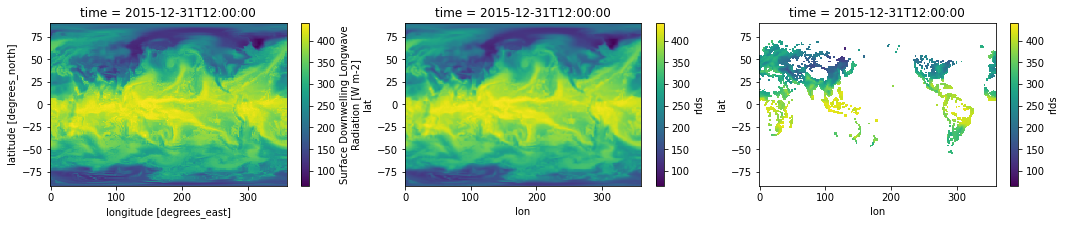

It takes elapsed_time 0.6581571102142334 to plot the layer
It takes elapsed_time 30.752508401870728 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/rlus_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.8788995742797852 to load the data
*********Start to merge*********
It takes elapsed_time 0.039409637451171875 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.342586040496826 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.073621988296509 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6622395515441895 to mask the layer
*********Start to plot the layer*********


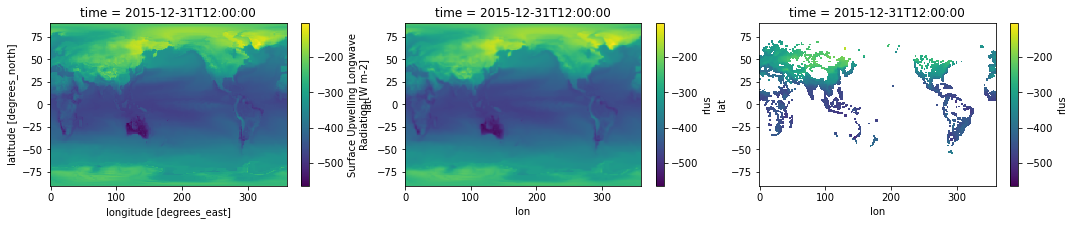

It takes elapsed_time 0.6223680973052979 to plot the layer
It takes elapsed_time 30.620216369628906 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/rsds_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.9063832759857178 to load the data
*********Start to merge*********
It takes elapsed_time 0.05169677734375 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.257671356201172 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.046520709991455 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.653050422668457 to mask the layer
*********Start to plot the layer*********


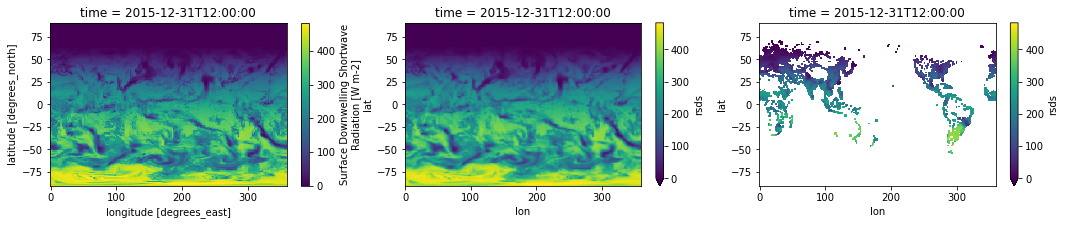

It takes elapsed_time 0.6304800510406494 to plot the layer
It takes elapsed_time 30.547139167785645 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/rsus_day_ACCESS1-0_rcp85_r1i1p1_20060101-20301231.nc
It takes elapsed_time 1.8321516513824463 to load the data
*********Start to merge*********
It takes elapsed_time 0.0359799861907959 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.33651089668274 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.053018808364868 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6541163921356201 to mask the layer
*********Start to plot the layer*********


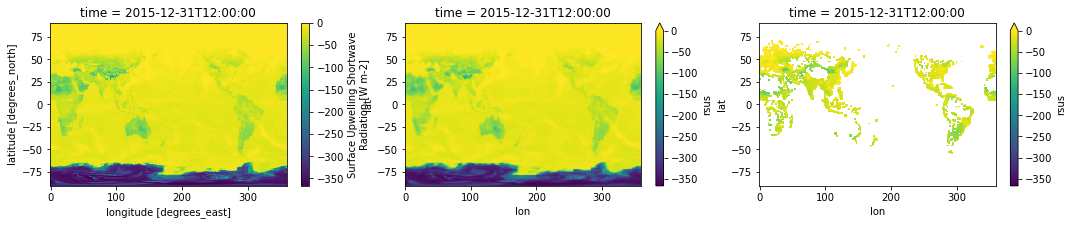

It takes elapsed_time 0.6666147708892822 to plot the layer
It takes elapsed_time 30.57922863960266 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2031, 25)

In [5]:
df = get_urban_df(ds)
del ds
gc.collect()
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

It takes elapsed_time 33.28719401359558 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

190.75730848312378


# Step 3: 2061-2070 

In [6]:
del df
gc.collect()

20

******Start to process huss******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/huss_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.954838514328003 to load the data
*********Start to merge*********
It takes elapsed_time 0.031388044357299805 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.379931449890137 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.067063808441162 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6557683944702148 to mask the layer
*********Start to plot the layer*********


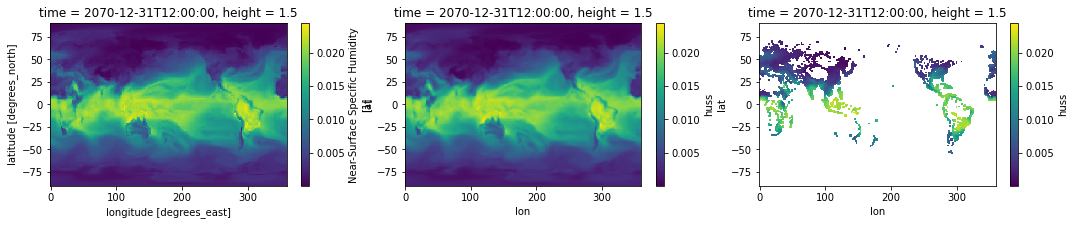

It takes elapsed_time 0.6378865242004395 to plot the layer
It takes elapsed_time 30.727975845336914 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/tas_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.5382285118103027 to load the data
*********Start to merge*********
It takes elapsed_time 0.05464458465576172 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 20.286656379699707 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.141026973724365 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6630902290344238 to mask the layer
*********Start to plot the layer*********


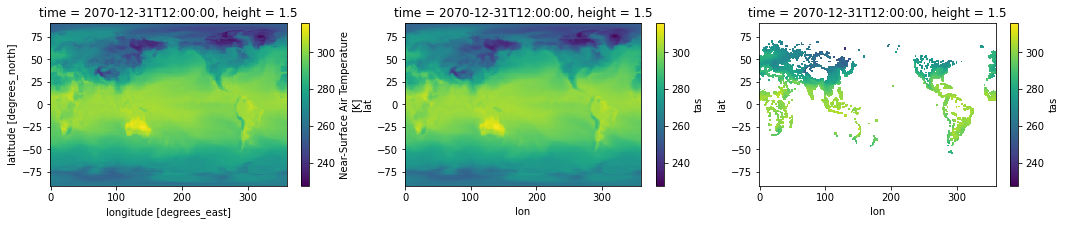

It takes elapsed_time 0.6457736492156982 to plot the layer
It takes elapsed_time 34.33043384552002 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/uas_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.8942723274230957 to load the data
*********Start to merge*********
It takes elapsed_time 0.04932117462158203 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.31048035621643 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 9.997449159622192 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6605830192565918 to mask the layer
*********Start to plot the layer*********


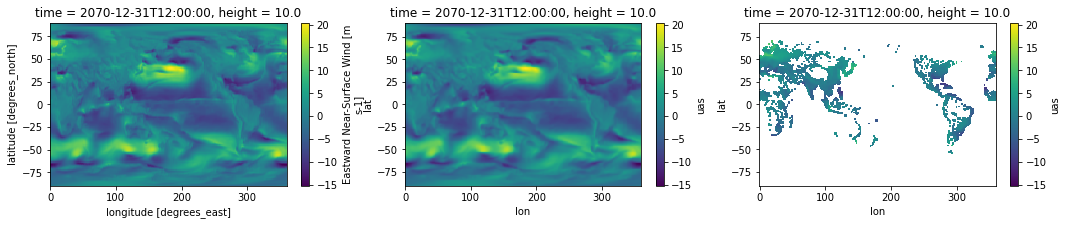

It takes elapsed_time 0.6871693134307861 to plot the layer
It takes elapsed_time 30.600271701812744 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/vas_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.8869109153747559 to load the data
*********Start to merge*********
It takes elapsed_time 0.03804469108581543 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.336129188537598 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.015739440917969 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6619751453399658 to mask the layer
*********Start to plot the layer*********


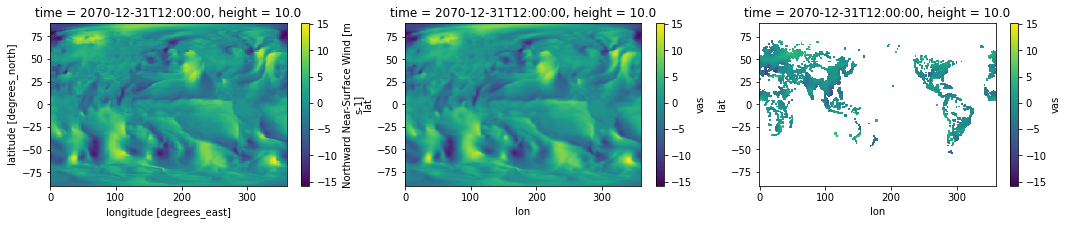

It takes elapsed_time 0.6862809658050537 to plot the layer
It takes elapsed_time 30.62687587738037 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/pr_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.9026434421539307 to load the data
*********Start to merge*********
It takes elapsed_time 0.03615689277648926 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 20.41054344177246 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.119879245758057 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6607706546783447 to mask the layer
*********Start to plot the layer*********


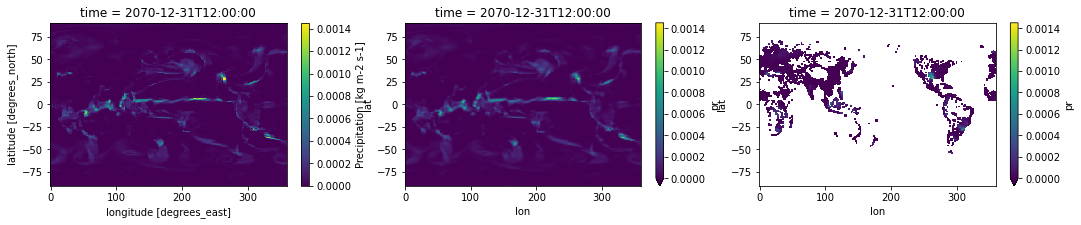

It takes elapsed_time 0.6506812572479248 to plot the layer
It takes elapsed_time 33.78167200088501 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/prsn_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.9188971519470215 to load the data
*********Start to merge*********
It takes elapsed_time 0.03918766975402832 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.576244592666626 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.29486083984375 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.663748025894165 to mask the layer
*********Start to plot the layer*********


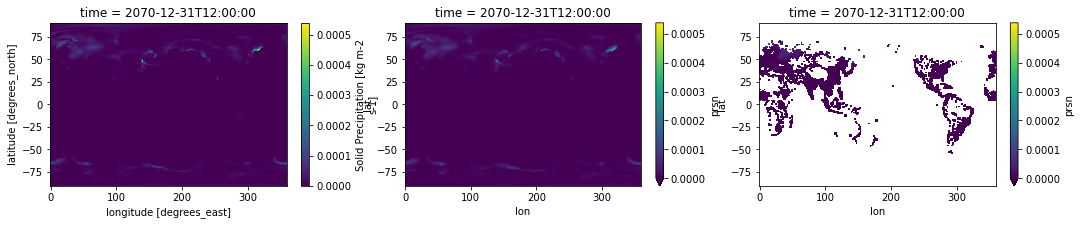

It takes elapsed_time 0.6766986846923828 to plot the layer
It takes elapsed_time 31.1712806224823 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/rlds_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.059298038482666 to load the data
*********Start to merge*********
It takes elapsed_time 0.06494259834289551 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.69278311729431 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.322341680526733 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6624178886413574 to mask the layer
*********Start to plot the layer*********


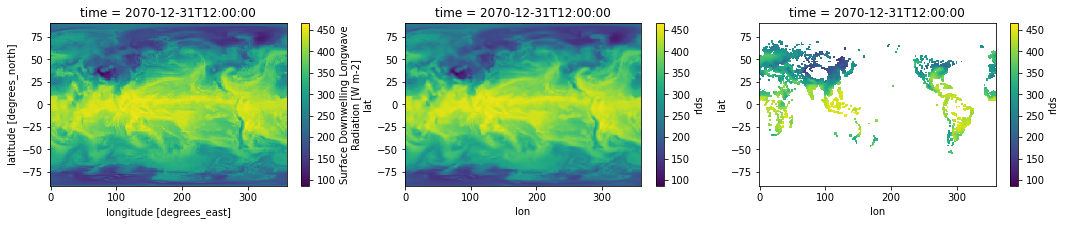

It takes elapsed_time 0.712761640548706 to plot the layer
It takes elapsed_time 31.51569104194641 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/rlus_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 2.0729262828826904 to load the data
*********Start to merge*********
It takes elapsed_time 0.07833743095397949 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.734360694885254 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.956815481185913 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6581287384033203 to mask the layer
*********Start to plot the layer*********


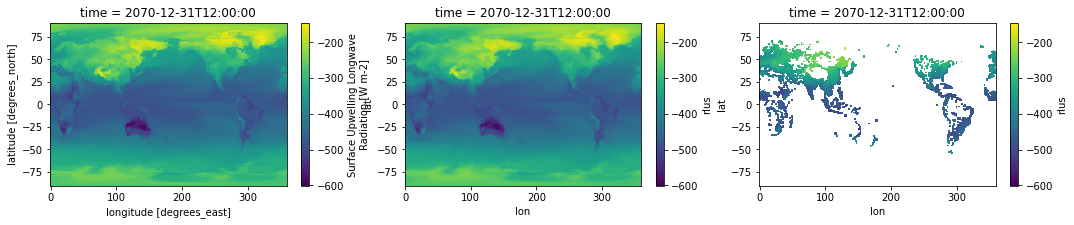

It takes elapsed_time 0.6250660419464111 to plot the layer
It takes elapsed_time 32.1270534992218 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/rsds_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.8722853660583496 to load the data
*********Start to merge*********
It takes elapsed_time 0.038634300231933594 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.59756565093994 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.061437368392944 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6647403240203857 to mask the layer
*********Start to plot the layer*********


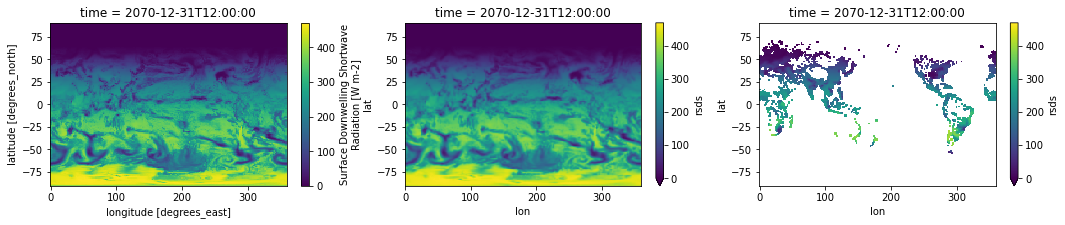

It takes elapsed_time 0.6399955749511719 to plot the layer
It takes elapsed_time 30.875964403152466 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5-RCP85_nc/ACCESS1-0/rsus_day_ACCESS1-0_rcp85_r1i1p1_20560101-20801231.nc
It takes elapsed_time 1.9646234512329102 to load the data
*********Start to merge*********
It takes elapsed_time 0.04790973663330078 to merge the time series
*********Start to build the regridder*********
It takes elapsed_time 17.530772924423218 to build the regridder
*********Start to regrid the layer*********


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


It takes elapsed_time 10.09076714515686 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6612730026245117 to mask the layer
*********Start to plot the layer*********


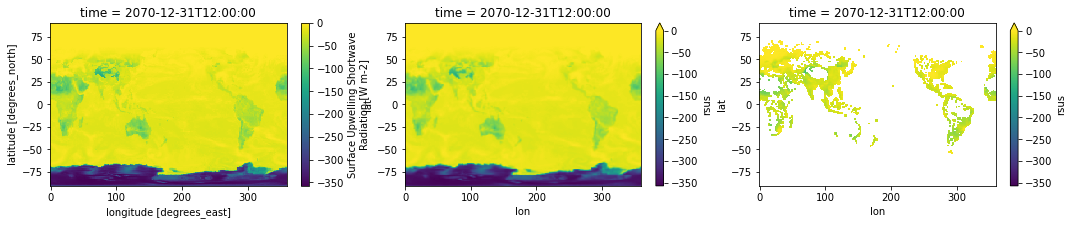

It takes elapsed_time 0.6555757522583008 to plot the layer
It takes elapsed_time 30.952555656433105 to deal with rsus in total
******End rsus******




In [7]:
ds = get_ds_2061(2056, 2081, 25)

In [8]:
df = get_urban_df(ds)
del ds
gc.collect()

start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

It takes elapsed_time 33.79595327377319 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/glade/work/zhonghua/miniconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

195.94885325431824
